---


# **PHASE 1 MILESTONE 2**

---

# i - Perkenalan

Nama : Irfan Risqy Trianto

Batch : BSD - 001

## Latar Belakang

Industri penerbangan adalah salah satu sektor yang penting dalam perekonomian global. Setiap tahunnya, jutaan orang menggunakan layanan maskapai penerbangan untuk melakukan perjalanan baik untuk tujuan bisnis maupun rekreasi. Keberhasilan maskapai penerbangan tidak hanya bergantung pada keamanan penerbangan, tetapi juga pada kepuasan penumpang. Keberhasilan ini mencakup berbagai aspek, mulai dari kenyamanan di dalam pesawat hingga pelayanan di bandara. 

Dalam era yang semakin terhubung digital ini, kepuasan pelanggan juga semakin dipengaruhi oleh layanan online, seperti pemesanan tiket, pelacakan penerbangan, dan komunikasi dengan maskapai. Maskapai yang mampu memahami dan meningkatkan kepuasan penumpangnya dapat menghasilkan manfaat besar, termasuk loyalitas pelanggan, ulasan positif, dan pertumbuhan bisnis yang berkelanjutan. Dalam upaya untuk mencapai ini, penggunaan model klasifikasi dalam menganalisis kepuasan penumpang dapat menjadi alat yang sangat berguna.

## Problem Statement

Dalam rangka meningkatkan layanan pelanggan dan memahami tingkat kepuasan pelanggan, H8 Airways berusaha untuk mengembangkan model klasifikasi yang dapat memprediksi kepuasan pelanggan berdasarkan data feedback pelanggan. Tujuan utama dari proyek ini adalah untuk mengembangkan model klasifikasi yang dapat memprediksi kepuasan pelanggan dengan tingkat akurasi yang tinggi menggunakan metrik accuracy sebagai indikator utama kinerja. Selain itu proyek ini bertujuan untuk dapat mengumpulkan dan mengelola data feedback pelanggan H8 Airways dengan efisien dan proyek ini diharapkan bisa dilakukan integrasi ke dalam operasional H8 Airways untuk meningkatkan layanan pelanggan dan mengidentifikasi area yang perlu ditingkatkan.

Dengan pernyataan masalah ini, fokus utama proyek ini ada pada pengembangan model klasifikasi untuk mengukur kepuasan pelanggan H8 Airways dengan metrik accuracy sebagai metrik evaluasi utama agar mendapatkan hasil identifikasi yang akurat dan meminimalisir kesalahan dalam identifikasi. H8 Airways berharap dapat meningkatkan kepuasan pelanggan, mengurangi keluhan dan meningkatkan kualitas layanan kami secara keseluruhan.

## Dataset

Untuk dataset kali ini didapatkan dari kaggle.com yang berjudul *Airline Passanger Satisfication* (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/code?select=train.csv). Dataset ini memiliki 25976  baris dan 25 kolom dengan masing-masing penjelasan kolom sebagai berikut.

| Variable     | Description                                                |
|--------------|------------------------------------------------------------|
| Id | Unique ID dari penumpang.
| Gender           | Jenis kelamin penumpang.            |
| Customer Type      | Tipe loyalitas penumpang.                    |
| Age       |  Usia dari penumpang.                                         |
| Type of Travel  | Tujuan perjalanan penumpang.                       |
| Class    | Kelas seat perjalanan penumpang.                         |
| Flight distance    | Jarak penerbangan dalam perjalanan.           |
| Inflight wifi service         | Tingkat kepuasan terhadap layanan wifi di dalam pesawat.      |
| Departure/Arrival time convenient       | Tingkat kepuasan terhadap kemudahan waktu keberangkatan/d kedatangan.                      |
| Ease of Online booking        | Tingkat kepuasan terhadap kemudahan pemesanan tiket secara online. |
| Gate location           | Tingkat kepuasan terhadap lokasi gerbang keberangkatan.                |
| Food and drink      | Tingkat kepuasan terhadap makanan dan minuman di pesawat.                      |
| Online boarding       | Tingkat kepuasan terhadap proses pembayaran online.                                          |
| Seat comfort  | Tingkat kepuasan terhadap kenyamanan kursi di pesawat.                         |
| Inflight entertainment    | Tingkat kepuasan terhadap layanan hiburan di pesawat.                          |
| On-board service    | Tingkat kepuasan terhadap layanan di dalam pesawat.           |
| Leg room service         | Tingkat kepuasan terhadap layanan ruang kaki di pesawat.       |
| Baggage handling       | Tingkat kepuasan terhadap penanganan bagasi.                      |
| Check-in service        | Tingkat kepuasan terhadap layanan check-in. |
| Inflight service         | Tingkat kepuasan terhadap layanan di dalam pesawat.       |
| Cleanliness       | Tingkat kepuasan terhadap kebersihan di pesawat.                     |
| Departure Delay in Minutes        | Menit keterlambatan saat keberangkatan. |
| Arrival Delay in Minutes | Menit keterlambatan saat kedatangan.
| Satisfaction           | Tingkat kepuasan penumpang terhadap maskapai penerbangan.             |

---

# ii - Import Libraries

Pada bagian ini dilakukan import libraries yang akan digunakan dalam pembuatan model.

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from phik import phik_matrix
import warnings

# Feature Engineering
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

import pickle
warnings.filterwarnings("ignore")


---

# iii - Data Loading

Pada bagian ini akan dilakukan loading dataset yang akan digunakan dalam pembuatan model.

In [2]:
# Load dataset
df_og = pd.read_csv("airlines.csv")

# Duplikat dataset
df = df_og.copy()

In [11]:
# Menampilkan 10 data teratas
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [12]:
# Menampilkan 10 data terbawah
df.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25966,25966,30263,Male,disloyal Customer,42,Business travel,Eco,1024,4,4,...,3,3,1,2,2,3,3,0,17.0,neutral or dissatisfied
25967,25967,90347,Female,disloyal Customer,39,Business travel,Business,404,1,1,...,2,5,3,4,4,4,2,0,0.0,neutral or dissatisfied
25968,25968,86816,Male,Loyal Customer,41,Business travel,Eco,692,2,2,...,2,2,3,3,2,3,2,15,3.0,neutral or dissatisfied
25969,25969,120654,Male,Loyal Customer,52,Business travel,Business,280,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
25970,25970,25309,Female,disloyal Customer,36,Business travel,Eco,432,1,5,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Bisa dilihat dari hasil coding diatas info dari dataset yang digunakan mempunyai 25976 baris dan 25 kolom yang dimana 1 kolom mempunyai dtype float64, 19 kolom mempunyai dtype int64 dan 5 kolom mempunyai dtype object.

In [6]:
# Cek duplikat
df.duplicated().sum()

0

Bisa dilihat dari hasil coding diatas bahwa tidak terdapat data yang duplikat pada dataset ini.

In [13]:
# Cek unique satisfication
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [3]:
# Mengganti values dalam satisfication
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 'dissatisfied'})
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Untuk memudahkan dalam pembuatan model, saya merubah values dari kolom satisfication menjadi sebagai berikut : 
- satisfied menjadi 1
- neutral or dissatisfied menjadi 0

In [4]:
# menghapus kolom tidak penting di df
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Kolom ini di drop karena isinya sama dengan kolom id.

In [6]:
df = df.dropna()
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
df.to_csv('P2G7_irfan_risqy_data_raw.csv', index=False)

---

# iv - Exploraatory Data Analysis (EDA)

Pada bagian Exploratory Data Analysis ini akan dilakukan eksplorasi dataset yang digunakan dalam bentuk visualisasi.

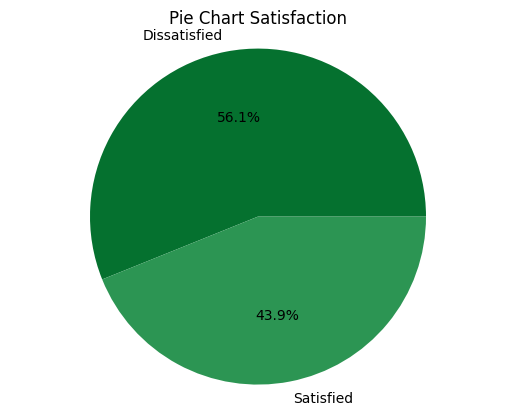

In [10]:
# Membuat Pie Chart
plt.pie(df.satisfaction.value_counts(), labels = ["Dissatisfied", "Satisfied"], colors = sns.color_palette("BuGn_r"), autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart Satisfaction')
plt.show()

Pie Chart Insights :

1. Jumlah persentase passenger yang satisfied sebesar 43.9%
2. Jumlah persentase passanger yang dissatisfied sebesar 56.1%
3. Persentase antara passanger yang satisfied dengan dissatisfied bisa dibilang inbalance.
4. Bisa dibilang masih banyak passanger H8 Airways yang kurang puas dengan experience terbang menggunakan H8 Airways.

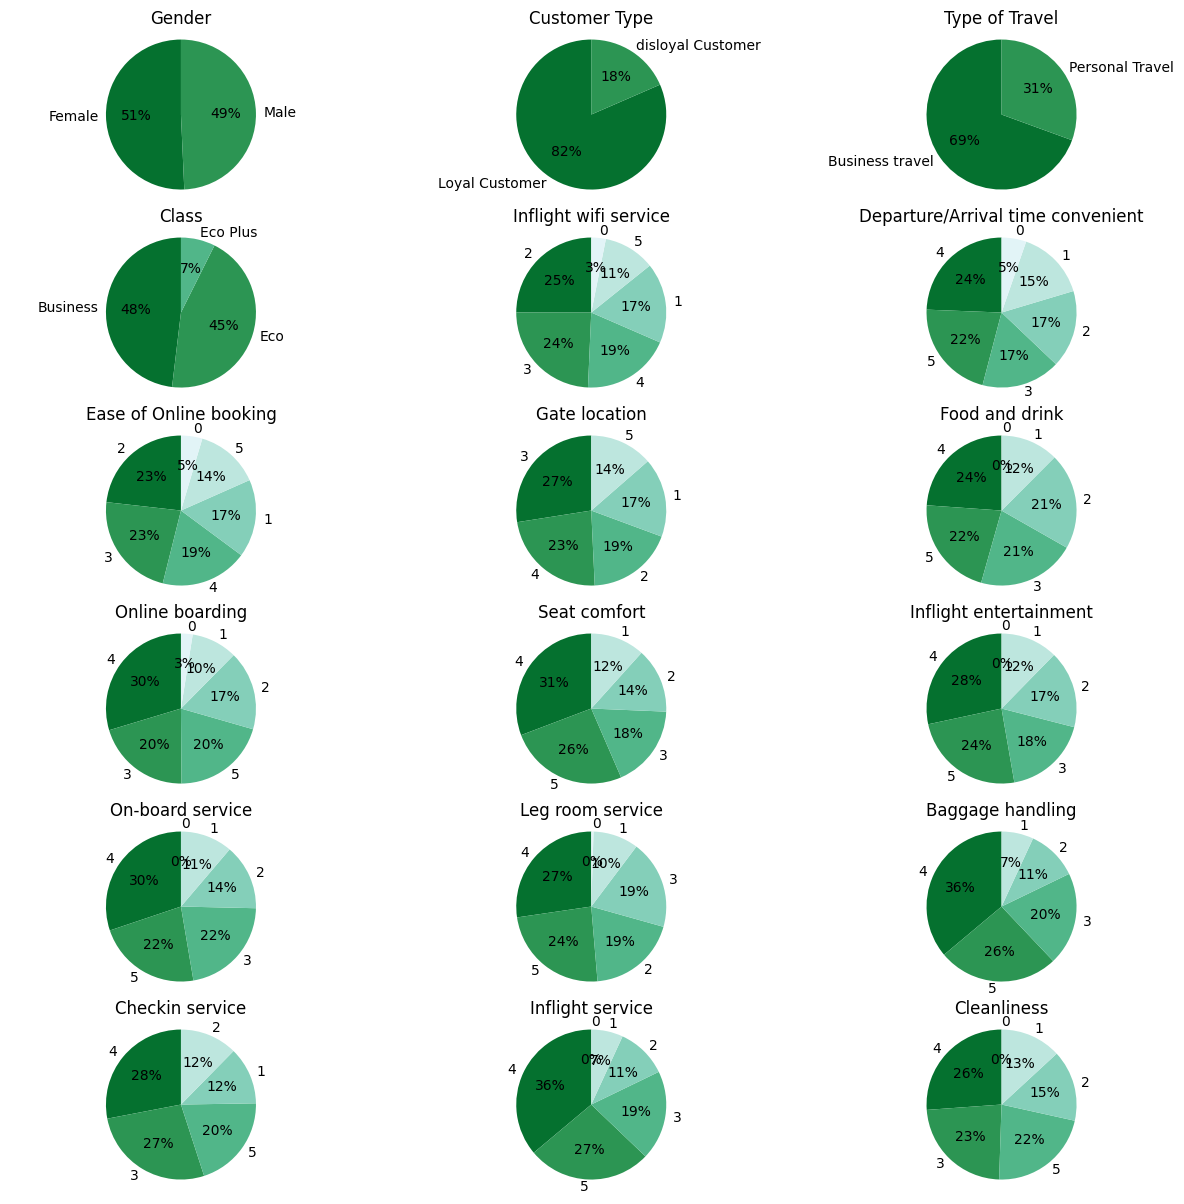

In [11]:
# Mencari index kolom kategorikal
categorical_indexes = [1, 2, 4, 5] + list(range(7, 21))
cat_idx = df.iloc[:,categorical_indexes].astype('category')

# Membuat pie chart kolom kategorikal
fig, axes = plt.subplots(6, 3, figsize = (15, 15))
for i, col in enumerate(cat_idx):
        column_values = df[col].value_counts()
        labels = column_values.index
        sizes = column_values.values
        axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("BuGn_r"), autopct = '%1.0f%%', startangle = 90)
        axes[i//3, i%3].axis('equal')
        axes[i//3, i%3].set_title(col)
plt.show()

Pie Chart Insights :

1. Kebanyakan passanger yang menggunakan jasa H8 Airways merupakan loyal customer.
2. Kebanyakan passanger yang menggunakan jasa H8 Airways bepergian dengan tujuan Business Travel.
3. Kebanyakan passanger H8 Airways kurang puas dengan Inflight WIFI Service dan Ease of Online Booking yang ditawarkan.
4. Passanger H8 Airways sudah cukup puas dengan Food and Drink, Gate location, Inflight Entertainment, Leg Room Service, Checkin Service dan Cleanliness yang ditawarkan.
5. Kebanyakan passanger H8 Airways sangat puas dengan Seat Comfort, Baggage Handling dan Inflight Service yang ditawarkan.

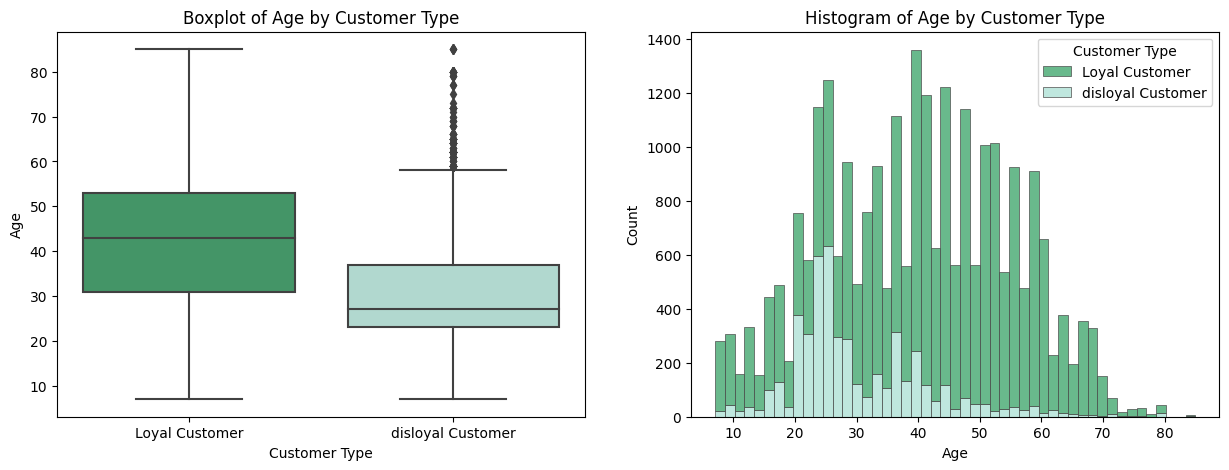

In [12]:
# Membuat subplots
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
sns.boxplot(x="Customer Type", y="Age", palette="BuGn_r", data=df, ax=ax[0])
ax[0].set_title('Boxplot of Age by Customer Type')
ax[0].set_xlabel('Customer Type')
ax[0].set_ylabel('Age')

# Histogram
sns.histplot(df, x="Age", hue="Customer Type", multiple="stack", palette="BuGn_r", edgecolor=".3", linewidth=.5, ax=ax[1])
ax[1].set_title('Histogram of Age by Customer Type')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

plt.show()

Boxplot and Histogram insights : 

1. Jumlah Loyal Customer jauh lebih banyak daripada Disloyal Customer.
2. Rentan usia passanger maskapai H8 Airways pada dataset ini yaitu 8 - 85 tahun. 
3. Kebanyakan Loyal Customer maskapai H8 Airways memiliki rentang usia dari 30 - 55 tahun.
4. Kebanyakan Disloyal Customer maskapai H8 Airways memiliki rentang usia dari 25 - 35 tahun.
5. Hal ini kemungkinan terjadi karena passanger yang usianya lebih muda kebanyakan lebih menyukai terbang dengan berbagai pilihan maskapai karena ingin mencoba hal baru oleh karena itu rata-rata persebaran disloyal customer berada pada passanger yang berusia muda.


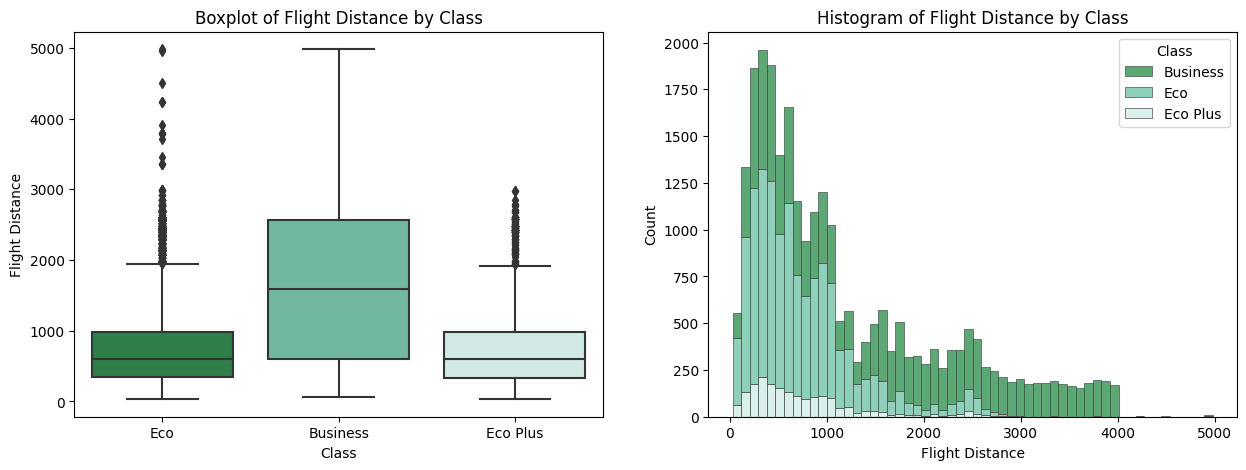

In [13]:
# Membuat subplots
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
sns.boxplot(x="Class", y="Flight Distance", palette="BuGn_r", data=df, ax=ax[0])
ax[0].set_title('Boxplot of Flight Distance by Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Flight Distance')

# Histogram
sns.histplot(df, x="Flight Distance", hue="Class", multiple="stack", palette="BuGn_r", edgecolor=".3", linewidth=.5, hue_order=["Business", "Eco", "Eco Plus"], ax=ax[1])
ax[1].set_title('Histogram of Flight Distance by Class')
ax[1].set_xlabel('Flight Distance')
ax[1].set_ylabel('Count')

plt.show()

Boxplot and Histogram insights :

1. Kebanyakan passanger maskapai H8 Airways memilih class Business dalam melakukan perjalanan.
2. Passanger maskapai H8 Airways cenderung memilih class Business untuk Flight Distance jauh.
3. Kebanyakan passanger maskapai H8 Airways memilih class Eco untuk Flight Distance dekat hingga menengah.
4. Class Eco Plus maskapai H8 Airways memiliki sedikit peminat.
5. Banyaknya peminat untuk Business Class merupakan hal yang bagus dari segi bisnis karena kebanyakan maskapai lain masih sulit untuk menjual class business mereka.

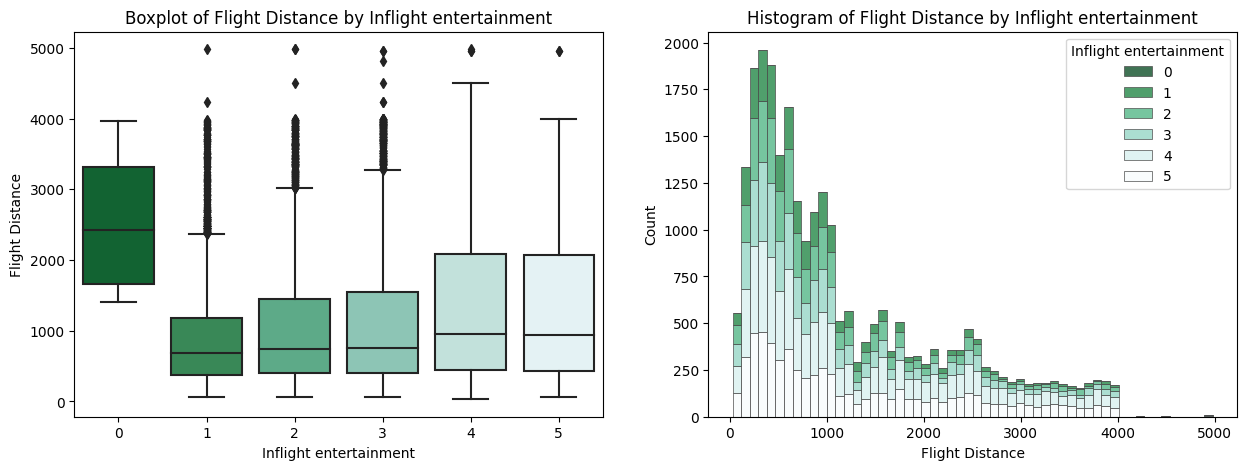

In [14]:
# Membuat subplots
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
sns.boxplot(x="Inflight entertainment", y="Flight Distance", palette="BuGn_r", data=df, ax=ax[0])
ax[0].set_title('Boxplot of Flight Distance by Inflight entertainment')
ax[0].set_xlabel('Inflight entertainment')
ax[0].set_ylabel('Flight Distance')

# Histogram
sns.histplot(df, x="Flight Distance", hue="Inflight entertainment", multiple="stack", palette="BuGn_r", edgecolor=".3", linewidth=.5, ax=ax[1])
ax[1].set_title('Histogram of Flight Distance by Inflight entertainment')
ax[1].set_xlabel('Flight Distance')
ax[1].set_ylabel('Count')

plt.show()

Boxplot and Histogram insights :

1. Kecenderungan yang bisa didapat dari hasil diatas adalah semakin tinggi Fligh Distance, rata-rata passanger maskapai H8 Airways cenderung lebih puas dengan Inflight Entertainment yang ditawarkan.
2. Hal ini bisa terjadi karena jika dalam flight yang dekat, passanger kemungkinan besar tidak memiliki waktu untuk menikmati Inflight Entertainment secara penuh, berbrda dengan passanger yang flight-nya jauh akan bisa menikmati Inflight Entertainment dengan lebih menyeluruh.

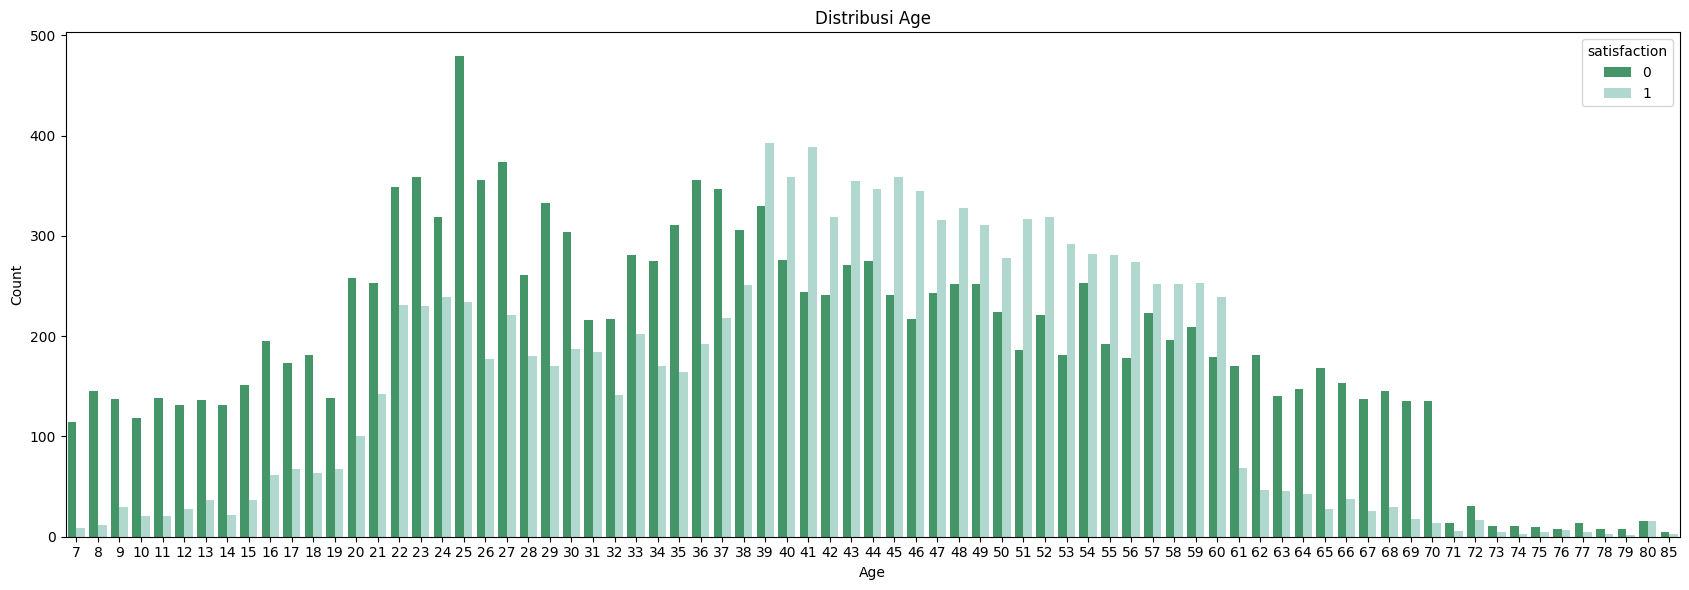

In [15]:
# Membuat Countplot
plt.figure(figsize=(17, 6))
ax = sns.countplot(data=df, x='Age', hue='satisfaction', palette='BuGn_r')
ax.set_title('Distribusi Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

Bar Chart Insights :

1. Rentang usia passanger maskapai H8 Airways yaitu dari umur 7 sampai dengan 85 tahun.
2. Kebanyakan passanger maskapai H8 Airways yang satisfied (1) berada pada rentang usia 39 sampai dengan 60 tahun.
3. Kebanyakan passanger maskapai H8 Airways yang dissatisfied (0) berada pada rentang usia 20 sampai dengan 38 tahun.

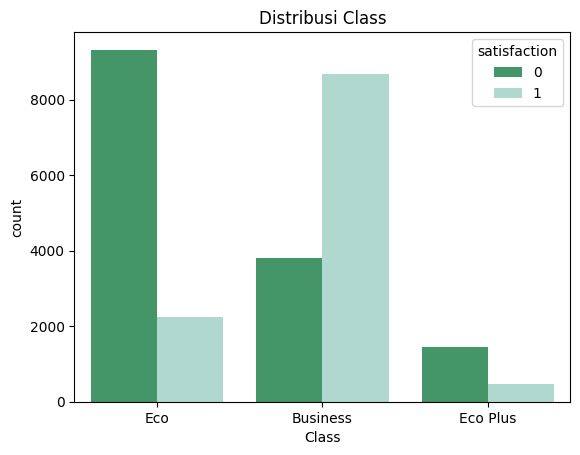

In [16]:
# Membuat Countplot
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "BuGn_r", data = df)
plt.title('Distribusi Class')
plt.show()

Bar Chart Insights :

1. Jumlah peminat Eco dan Business Class jauh lebih banyak ketimbang Eco Plus.
2. Pada Class Eco jauh lebih banyak passanger H8 Airways yang dissatisfied (0) dibandingkan satisfied (1).
3. Pada Class Business Class lebih banyak passanger H8 Airways yang satisfied (1) dibandingkan disssatisfied (0).
4. Pada Class Eco Plus lebih banyak passanger H8 Airways yang dissatisfied (0) dibandingkan satisfied (1).
5. Hal ini bisa diartikan jika memang Business Class yang ditawarkan oleh H8 Airways memiliki pelayanan yang baik dan dari sini juga bisa menjadi alasan mengapa Business Class dari H8 Airways banyak diminati.

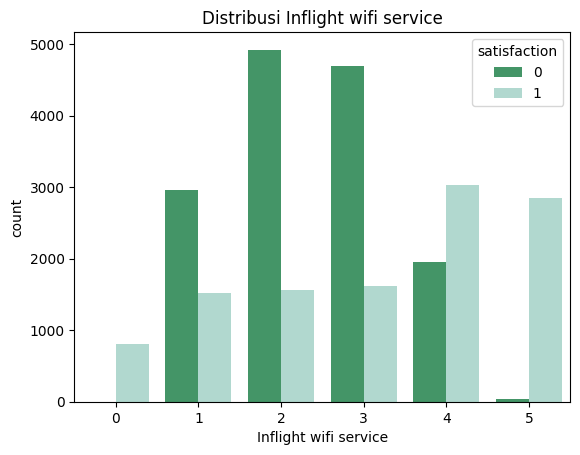

In [17]:
# Membuat Countplot
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "BuGn_r", data = df)
plt.title('Distribusi Inflight wifi service')
plt.show()

Bar Chart Insights :

1. Terdapat hal unik dimana ada beberapa passanger maskapai H8 Airways memberi penilaian 0 untuk Inflight WIFI Service namun mereka tetap merasa satisfied (1) terhadap keseluruhan layanan. 
2. Kebanyakan passanger H8 Airways yang memberi penilaian 1 - 3 untuk Inflight WIFI Service merasa dissatisfied (0) terhadap keseluruhan layanan.
3. Hampir seluruh passanger yang memberi penilain 5 untuk Inflight WIFI Service merasa satisfied (1) terhadap keseluruhan layanan.

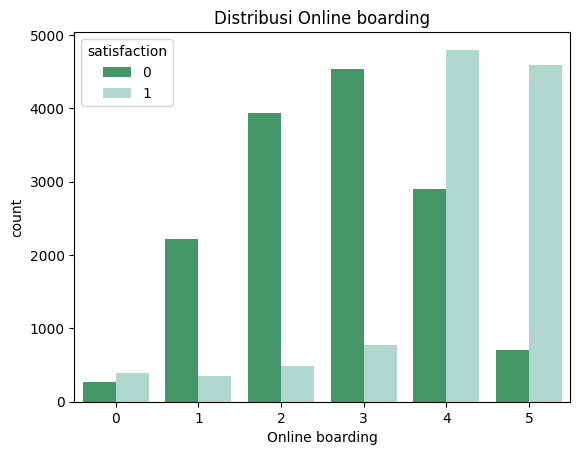

In [18]:
# Membuat Countplot
sns.countplot(x = 'Online boarding', hue = 'satisfaction', palette = "BuGn_r", data = df)
plt.title('Distribusi Online boarding')
plt.show()

Bar Chart Insights :

1. Kebanyakan passanger H8 Airways yang memberi penilaian 1 - 3 untuk Online Boarding merasa dissatisfied (0) terhadap keseluruhan layanan.
2. Kebanyakan passanger H8 Airways yang memberi penilaian 4 - 5 untuk Online Boarding merasa satisfied (1) terhadap keseluruhan layanan.
3. Bisa dibilang fitur Online Boarding memiliki pengaruh yang signifikan terhadap tingkat satisfaction passanger, karena kebanyakan passanger yang memberi penilaian rendah (1, 2, 3) terhadap Online Boarding sudah pasti merasa dissatisfied (0) dan begitupun sebaliknya.

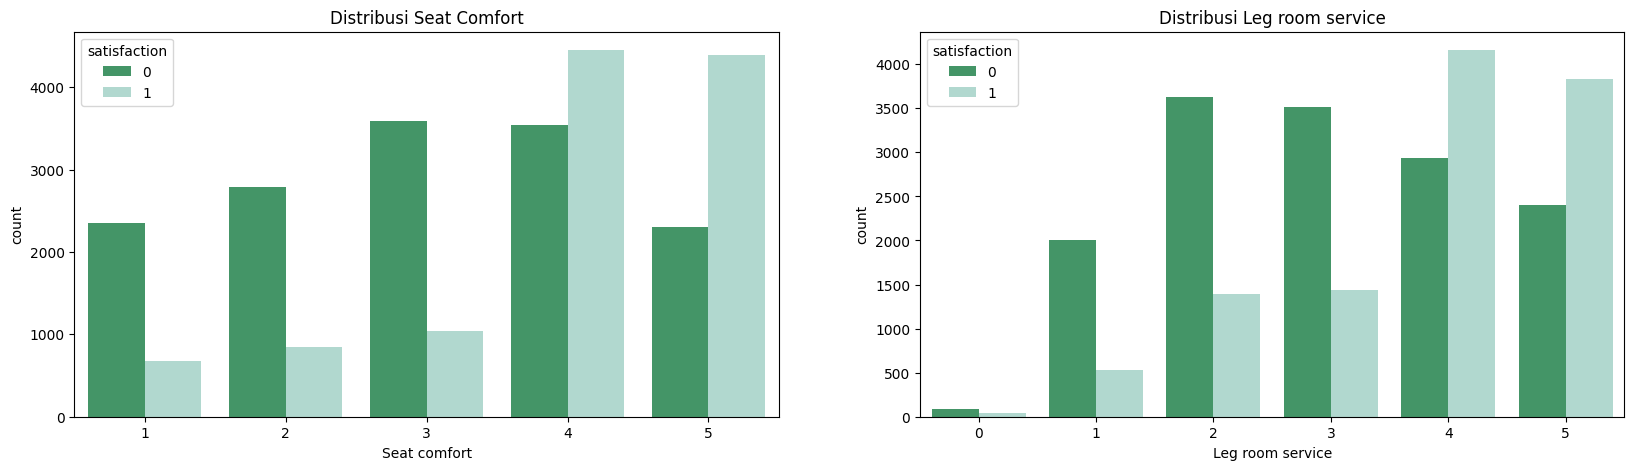

In [19]:
# Membuat subplots
f, ax = plt.subplots(1, 2, figsize=(20, 5))

# Membuat Countplot 1
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "BuGn_r", data = df, ax = ax[0])
ax[0].set_title('Distribusi Seat Comfort')

# Membuat Countplot 2
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "BuGn_r", data = df, ax = ax[1])
ax[1].set_title('Distribusi Leg room service')

plt.show()


Bar Chart Insights :

1. Trend penilaian passanger H8 Airways terhadap Seat Comfort dan Leg Room Service cenderung memiliki kesamaan.
2. Kebanyakan passanger H8 Airways yang memberi penilaian 1 - 3 untuk Seat Comfort dan Leg Room Service merasa dissatisfied (0) terhadap keseluruhan layanan.
3. Tidak sedikit passanger H8 Airways yang memberi penilaian 4 -5 untuk Seat Comfort dan Leg Room Service namun masih tetap merasa dissatisfied (0) terhadap keseluruhan layanan.
4. Beberapa passanger H8 Airways yang memberi penilaian 4 -5 untuk Seat Comfort dan Leg Room Service merasa satisfied (1) terhadap keseluruhan layanan.

interval columns not set, guessing: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


<Axes: >

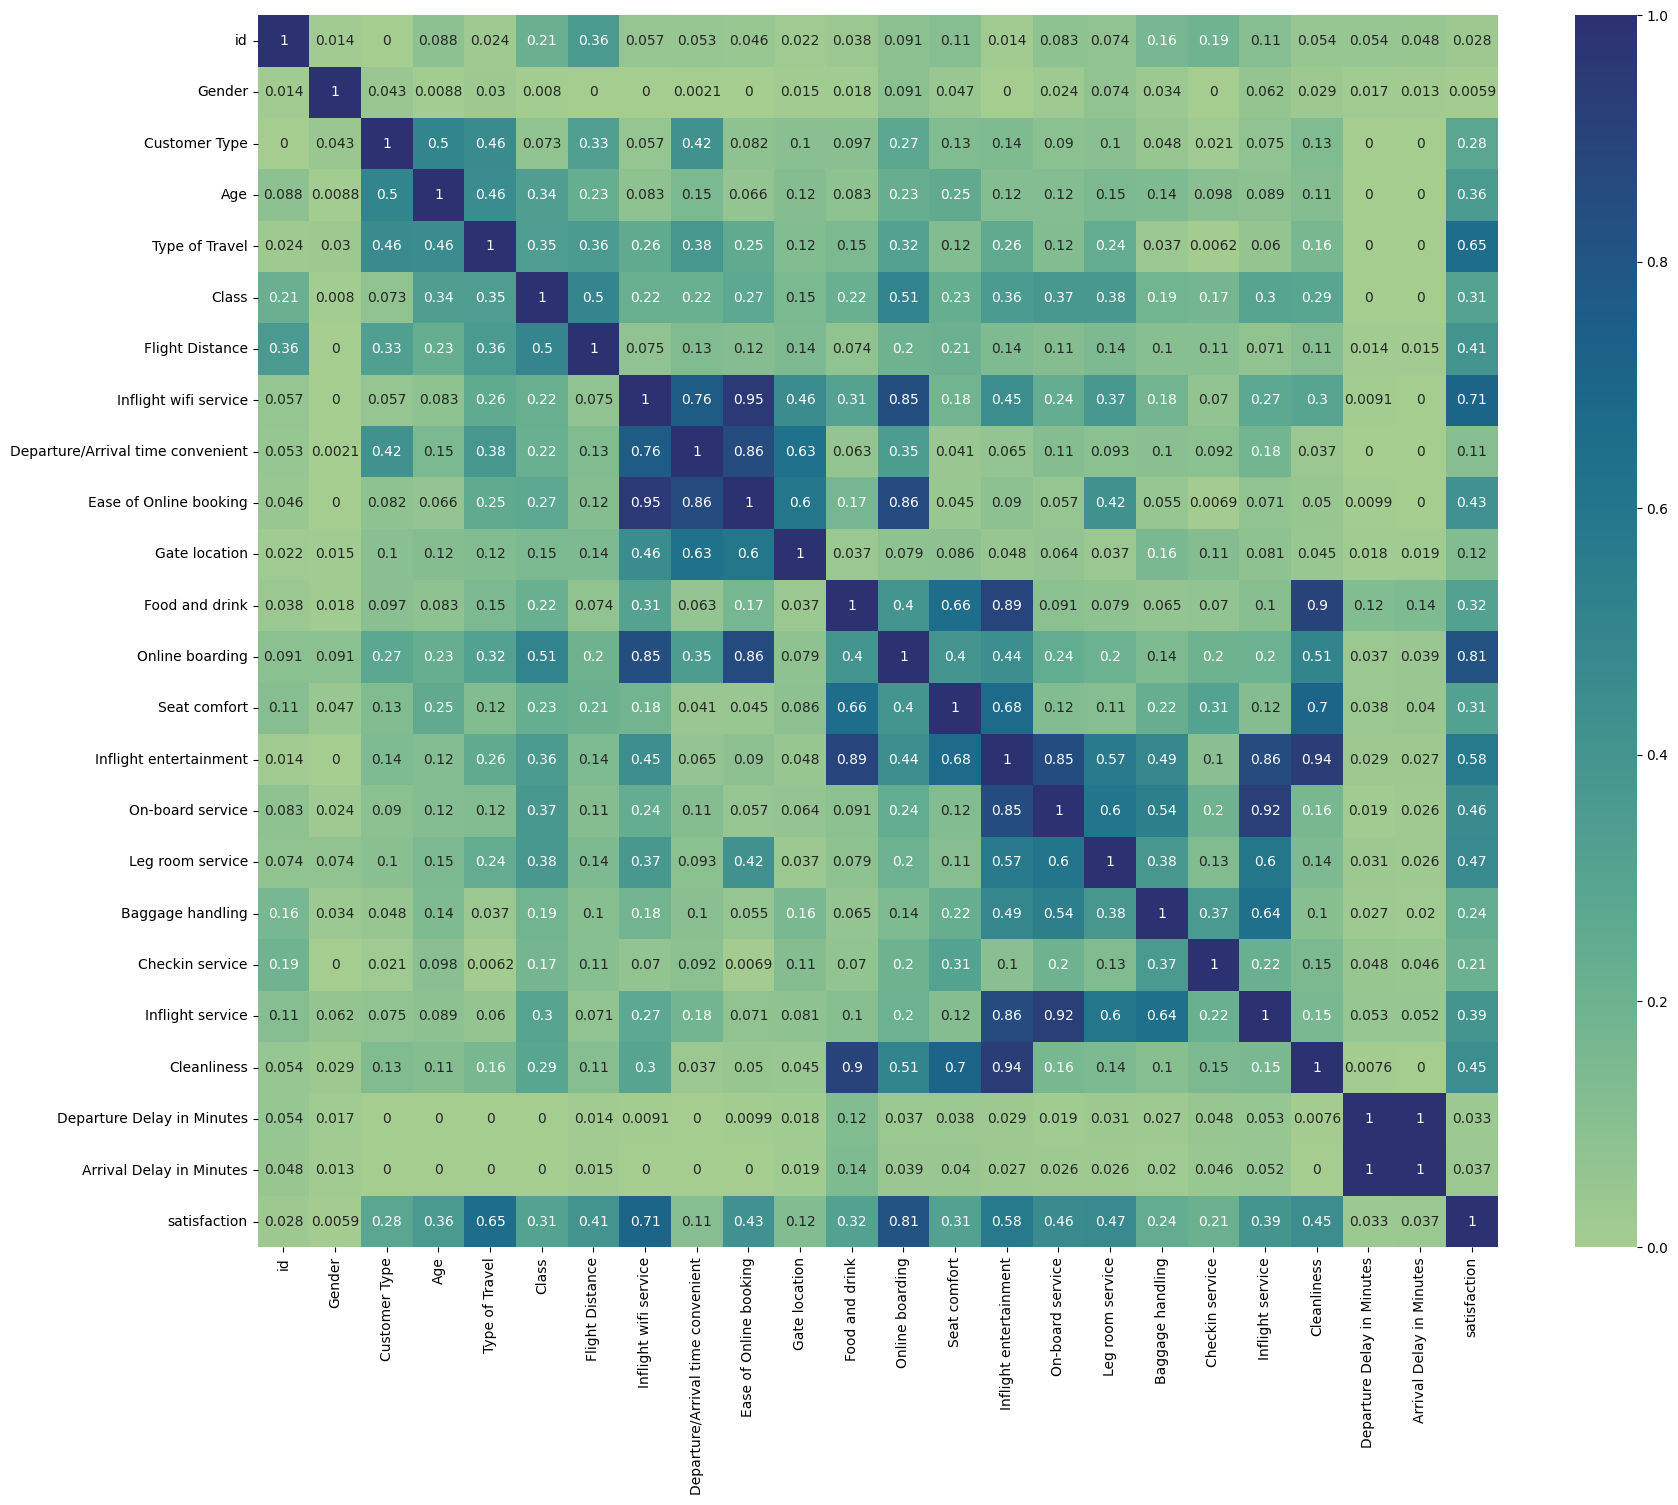

In [20]:
# Hitung matriks korelasi Phi-K 
phik_corr_matrix = phik_matrix(df)

# Buat heatmap dari matriks korelasi Phi-K
plt.figure(figsize=(20, 16))
sns.heatmap(phik_corr_matrix, annot=True, cmap='crest')

PHIK Correlation Heatmap Insights :

1. Id, Gender, Departure & Arrival Delay in Minutes tidak memiliki korelasi yang signifikan terhadap Satisfaction passanger.
2. Flight Distance, Ease of Online Booking, On-board & Leg Room Service dan Cleanliness memiliki korelasi yang lumayan signifikan terhadap Satisfaction passanger.
3. Type of Travel, Inflight WIFI Service dan Online Boarding memiliki korelasi yang signifikan terhadap Satisfaction passanger.

---

# v - Feature Engineering

Pada bagian ini akan dilakukan preprocessing data sebelum dijadikan model seperti handling outliers, scaling, encoding, dll.

## Copy Dataframe untuk Feature Engineering

In [21]:
# Copy df untuk Feature Engineering
df_fe = df.copy()
df_fe.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


## Handling Missing Values

In [22]:
# Mencari missing values 
df_fe.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

- Terdapat missing values pada arrival Delay in Minutes, jumlah missing values dari kolom tersebut adalah 83.
- Untuk missing value pada kolom Arrival Delay in Minutes termasuk dalam kategori MNAR (Missing not at Random) karena kolom Arrival Delay in Minutes itu memiliki hubungan dengan Departure Delay in Minutes karena secara sederhananya memang jika departure mengalami delay, arrival otomatis juga akan berdampak menjadi delay.

In [23]:
# Menghitung persentase missing values
nulls = pd.DataFrame(df_fe.isnull().sum(), columns=["nulls"])
nulls["null percentage"] = nulls["nulls"]/df_fe.shape[0]*100
nulls[nulls["nulls"] > 0]

,nulls,null percentage
Arrival Delay in Minutes,83,0.319526


Bisa dilihat persentase missing values pada kolom Arrival Delay in Minutes yang berjumlah 83 itu persentasenya hanya 0.319% dari total values yang dimana angka tersebut bisa dibilang sangat kecil sehingga untuk handling missing values kali ini akan dilakukan drop missing values tersebut.

In [24]:
# Drop missing values
df_fe = df_fe.dropna()

In [25]:
# Mencari missing values 
df_fe.isnull().sum().sum()

0

Missing values menjadi 0 setelah dilakukan drop.

## Split Feature dan Target

In [26]:
# Split x dan y
X = df_fe.drop(columns=['satisfaction'],axis=1)
y = df_fe['satisfaction']
X.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


Bisa dilihat hasil dari coding diatas telah dilakukan split antara X (fitur) dan y (target) yang dimana pada dataset ini targetnya adalah kolom *satisfaction*.

## Split Train dan Test

In [27]:
# Split menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

print('train Size', X_train.shape)
print('test size', X_test.shape)
X_train.head()

train Size (20714, 23)
test size (5179, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
23041,26380,Male,Loyal Customer,64,Personal Travel,Eco,991,2,1,2,...,1,1,3,3,4,1,4,1,0,0.0
2538,32057,Female,Loyal Customer,31,Business travel,Business,102,1,1,1,...,4,4,5,2,1,3,4,4,2,5.0
20487,11672,Female,disloyal Customer,23,Business travel,Eco,395,2,0,3,...,4,4,5,2,5,5,5,4,45,67.0
24419,62853,Female,Loyal Customer,48,Business travel,Business,2218,5,5,5,...,4,4,4,4,4,5,4,5,0,1.0
1106,40831,Male,Loyal Customer,33,Business travel,Business,3151,3,2,3,...,5,5,3,3,4,1,1,5,2,15.0


Bisa dilihat hasil dari coding diatas yaitu split antara X train dan X test yang dimana train menjadi 20713 data sedangkan test menjadi 5179 data.

## Split Categorical dan Numerical Columns

In [28]:
# Cek Jumlah Unique Values
X_train.nunique()

id                                   20714
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3110
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             293
Arrival Delay in Minutes               297
dtype: int6

In [29]:
# Cek Kolom
X_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [30]:
# Memisahkan Categorical dan Numerical Column
num_cols = ['id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

Split Numerical dan Categorical features ini didapatkan dari cek nunique values dan melihat sekilas dataframe dari X_train.

## Balancing Data

In [31]:
# Mencari indices categorical column
categorical_column_indices = [X_train.columns.get_loc(col) for col in cat_cols]

In [32]:
# Balancing data dengan SMOTENC
smote_nc = SMOTENC(categorical_column_indices, random_state=20)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train.value_counts()

satisfaction
0    11665
1    11665
Name: count, dtype: int64

Berdasarkan hasil pie chart pada EDA distribusi yang satisfied dan dissatisfied tidak balance oleh karena itu dilakukan balancing menggunakan SMOTENC. Bisa dilihat hasil dari balancing data menghasilkan jumlah satisfaction 0 dan 1 menjadi balance.

## Handling Outliers

In [33]:
# Cek Skewness 
print('skewness id:', X_train['id'].skew())
print('skewness Age:', X_train['Age'].skew())
print('skewness Flight Distance:', X_train['Flight Distance'].skew())
print('skewness Departure Delay in Minutes:', X_train['Departure Delay in Minutes'].skew())
print('skewness Arrival Delay in Minutes:', X_train['Arrival Delay in Minutes'].skew())

skewness id: -0.01563978276544958
skewness Age: -0.02209044097311025
skewness Flight Distance: 1.035341622255828
skewness Departure Delay in Minutes: 6.6945381429013295
skewness Arrival Delay in Minutes: 6.521150836607822


Bisa dilihat yang memiliki distribusi skew adalah fitur Flight Distance, Departure Delay in Minutes dan Arrival Delay in Minutes yang dimana skewness nya diatas 1. Sedangkan untuk id dan Age terbilang distribusi normal.

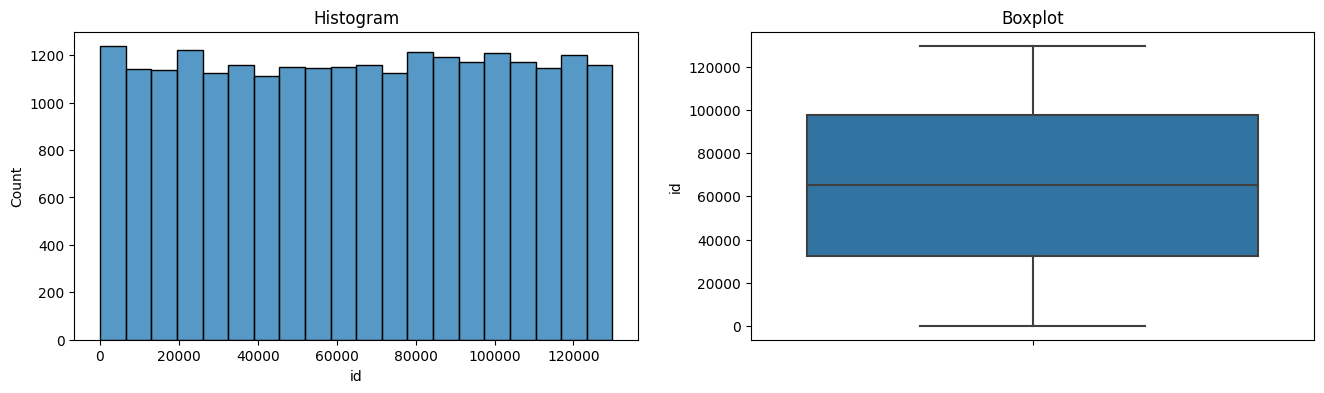

In [34]:
# Membuat Histogram dan Boxplot id
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['id'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['id'])
plt.title('Boxplot')

plt.show()

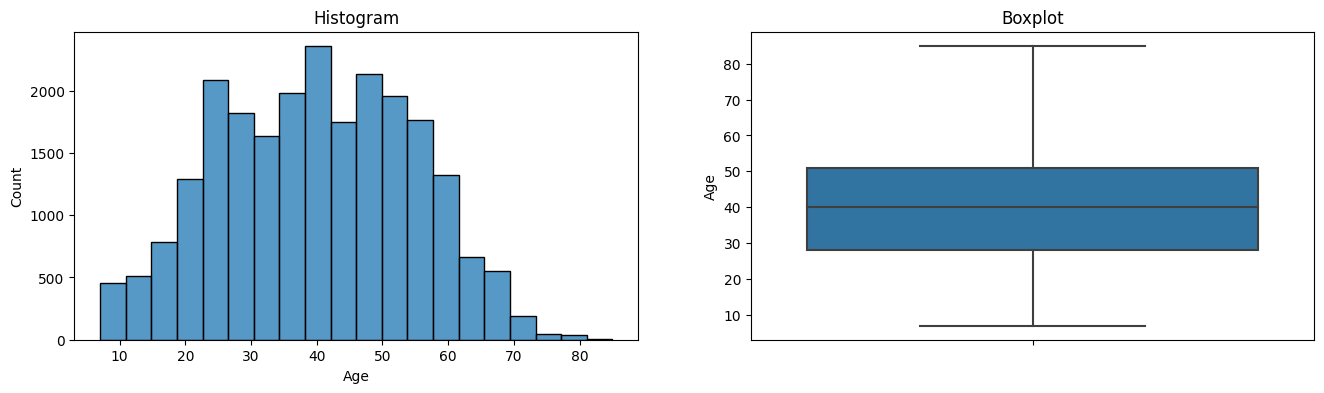

In [35]:
# Membuat Histogram dan Boxplot Age
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Age'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Age'])
plt.title('Boxplot')

plt.show()

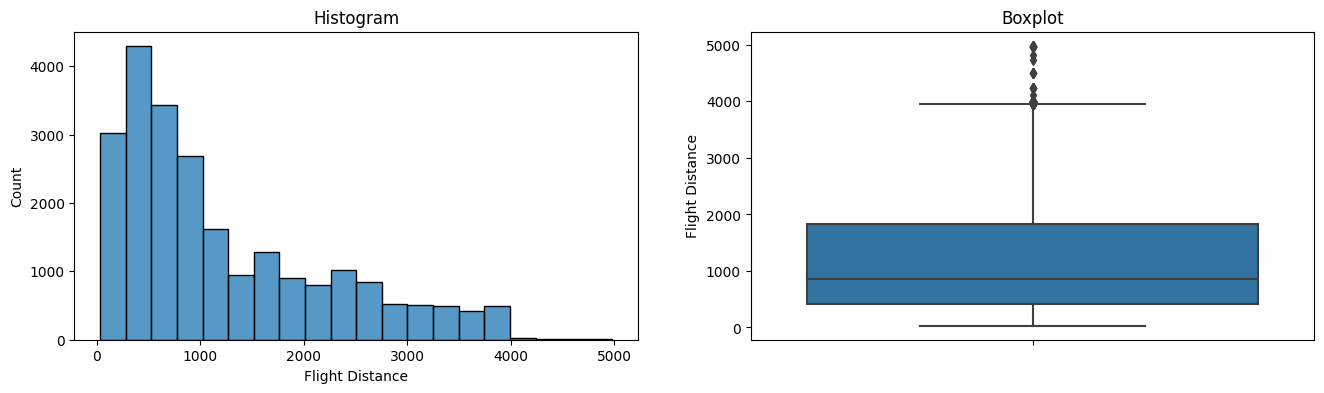

In [36]:
# Membuat Histogram dan Boxplot Flight Distance
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Flight Distance'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Flight Distance'])
plt.title('Boxplot')

plt.show()

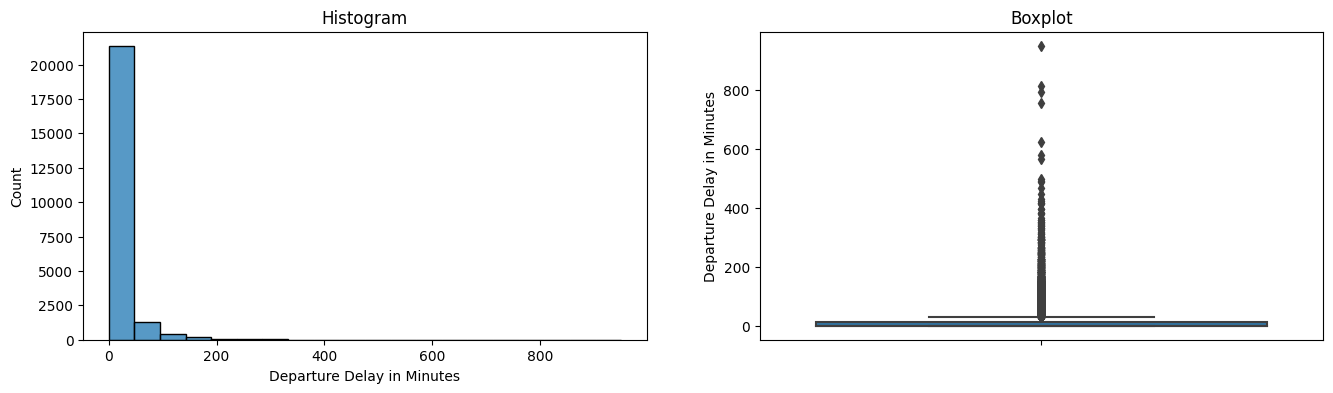

In [37]:
# Membuat Histogram dan Boxplot Departure Delay in Minutes
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Departure Delay in Minutes'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Departure Delay in Minutes'])
plt.title('Boxplot')

plt.show()

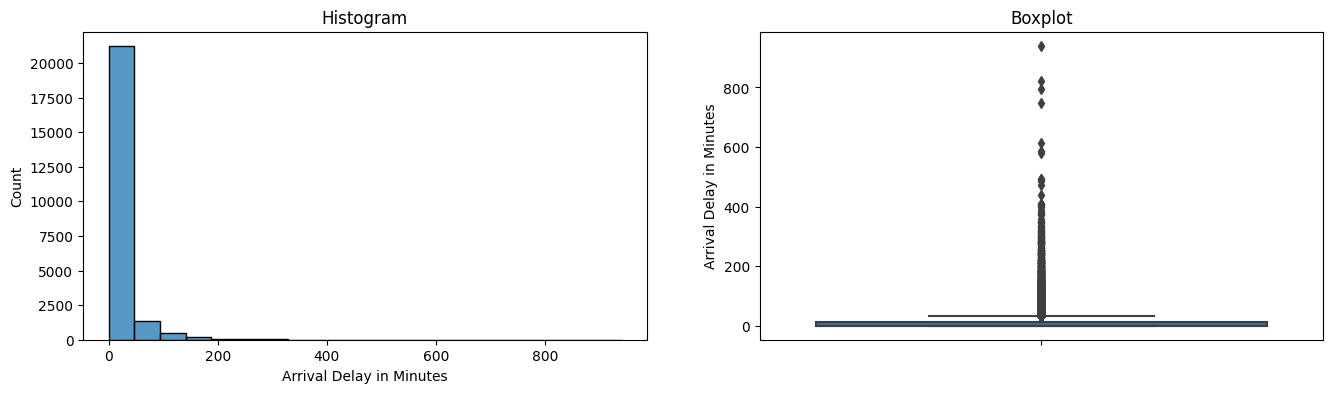

In [38]:
# Membuat Histogram dan Boxplot Arrival Delay in Minutes
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Arrival Delay in Minutes'], bins=20)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Arrival Delay in Minutes'])
plt.title('Boxplot')

plt.show()

In [39]:
# IQR
q1 = df_fe[num_cols].quantile(0.25)
q3 = df_fe[num_cols].quantile(0.75)
iqr = q3 - q1

# lower dan upper limit
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# menghitung persentase outlier
outlier_percentages = ((df_fe[num_cols] < lower_threshold) | (df_fe[num_cols] > upper_threshold)).mean() * 100

print('Outlier Percentage:')
print(outlier_percentages)

Outlier Percentage:
id                             0.000000
Age                            0.000000
Flight Distance                2.239988
Departure Delay in Minutes    13.679373
Arrival Delay in Minutes      13.663925
dtype: float64


Bisa dilihat untuk kolom id dan Age tidak terdeteksi outlier karena kedua kolom tersebut terdistribusi normal sedangkan untuk kolom Flight Distance memiliki persentase 2.2% outliers dan untuk kolom Departure & Arrival Delay in Minutes memiliki persentase outlier sebesar 13.6%.

In [40]:
# Define Winsorizer
win = Winsorizer(capping_method='iqr', 
                 tail='both', 
                 fold=3, 
                 variables=num_cols)

# Fit dan transform data train
X_train_capped = win.fit_transform(X_train)

Pada handling outliers kali ini saya menggunakan metode capping karena persentase outlier pada Departure & Arrival Delay in Minutes terbilang besar. 

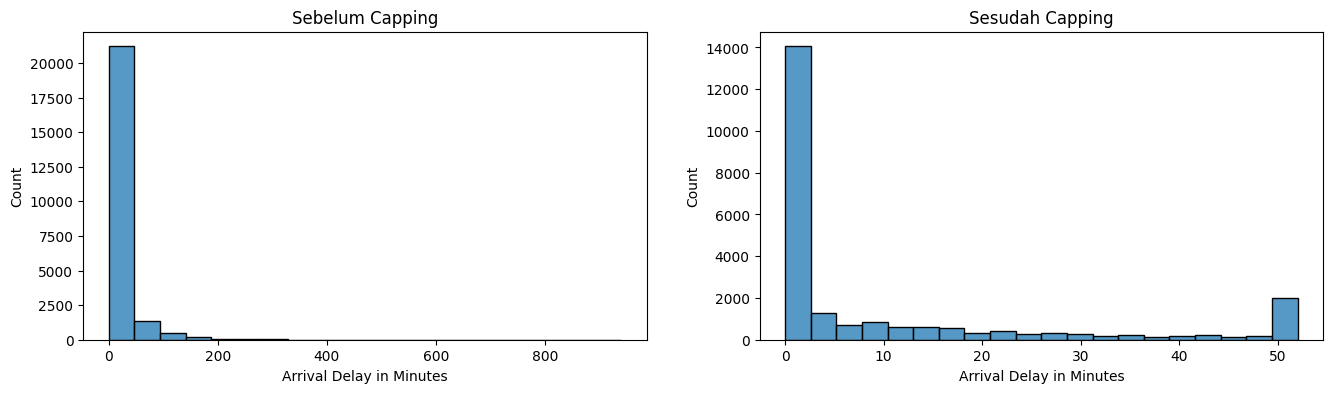

In [41]:
# Perbandingan sebelum dan sesudah capping
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Arrival Delay in Minutes'], bins=20)
plt.title('Sebelum Capping')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(X_train_capped['Arrival Delay in Minutes'], bins=20)
plt.title('Sesudah Capping')

plt.show()

Bisa dilihat sebelum dan sesudah dilakukan capping terlihat persebaran data pada kolom Arrival Delay in Minutes terlihat sedikit lebih baik setelah dilakukan capping.

## Pipeline

In [42]:
# Feature Selection
num_cols = ['Age', 'Flight Distance']

cat_cols = ['Customer Type', 'Type of Travel', 'Class']

no_action_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

1. Berdasarkan hasil heatmap PHIK correlation yang ada di EDA, fitur Id, Gender, Departure Delay in Minutes dan Arrival Delay in Minutes tidak memiliki korelasi yang signifikan terhadap satisfaction, maka dari itu disini saya tidak input 4 fitur tersebut pada num_cols, cat_cols ataupun no_action_cols.

2. Untuk no_action_cols itu berisikan kolom kategorikal yang sudah berbentuk numerik sehingga tidak perlu lagi untuk dilakukan encoding.

In [43]:
# Define Pipelone
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols),
    ('no_action', 'passthrough', no_action_cols)
], remainder='drop')

Disini telah dilakukan pipeline, untuk numerical column disini saya menggunakan minmaxscaler karena minmaxscaler bisa dibilang tahan dengan masalah outlier sedangkan untuk kolom categorical saya menggunakan OneHotEncoder karena secara keseluruhan data pada kolom kategorikal tidak memiliki variasi yang banyak sedangkan untuk kolom kategorikal yang sudah berbentuk angka 1-5 dimasukkan dalam kolom no_action dan di passthrough saja tanpada dilakukan encoding.

---

# vi - Model Definition

Pada bagian ini akan dilakukan define model yang akan digunakan dalam pembuatan model ini.

In [44]:
# Definisi model KNN
knn_model = KNeighborsClassifier()

# Definisi model SVM
svm_model = SVC()

# Definisi model Decision Tree
dt_model = DecisionTreeClassifier()

# Definisi mdoel Random Forest
rf_model = RandomForestClassifier()

# Define Boosting
ad_model = AdaBoostClassifier()

Berikut ini adalah penjelasan singkat mengenai model diatas :

1. **K-Nearest Neighbors (KNN)** : KNN adalah algoritma berdasarkan konsep bahwa objek cenderung memiliki label yang sama dengan tetangga terdekatnya.

2. **Support Vector Machine (SVM)** : SVM mencari hyperplane terbaik yang memaksimalkan margin antara dua kelas dalam data.

3. **Decision Tree** : Decision Tree adalah struktur hierarki yang digunakan untuk pengambilan keputusan berdasarkan fitur-fitur data.

4. **Random Forest** : Random Forest adalah ensemble dari banyak pohon keputusan yang menggabungkan prediksi mereka untuk meningkatkan akurasi dan mengurangi overfitting.

5. **AdaBoost (Adaptive Boosting)** : AdaBoost adalah algoritma ensemble yang memperkuat model lemah dengan memberikan bobot lebih besar pada data yang salah diklasifikasikan sebelumnya.

Untuk pemilihan model mana yang akan dilakukan nanti akan dilakukan model benchmarking terlebih dahulu dan dilihat model mana yang memiliki score paling tinggi.

---

# vii - Model Training

Pada bagian ini akan dilakukan model training dengan melakukan model benchmarking dan hyperparameter tuning.

## Model Benchmarking

Pada bagian ini akan dilakukan model benchmarking menggunakan grid search yang dimana model KNN, SVM, Decision Tree, Random Forest dan Gradient Boosting akan dilakukan benchmarking dan hasilnya akan diurutkan berdasarkan nilai accuracy yang tertinggi. Model yang mempunyai nilai accuracy score tertinggi akan dipilih untuk dilakukan hyperparameter tuning.

In [45]:
# Model list
models = {'model' : [knn_model, svm_model, dt_model, rf_model, ad_model]}

# Membuat pipeline
estimators = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('model', models)])

# Define Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Model Benchmarking dengan Grid Search
search = GridSearchCV(
    estimator=estimators,
    param_grid=models,
    scoring=['accuracy'],
    cv=skfold,
    return_train_score=True,
    refit=False 
)

In [46]:
# Fit hasil Model Bencmarking using Grid Search
search.fit(X_train_capped, y_train)

# Result
cv_result = pd.DataFrame(search.cv_results_)
cv_result


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.031329,0.005626,0.182255,0.015092,KNeighborsClassifier(),{'model': KNeighborsClassifier()},0.913631,0.917488,0.917703,0.92799,...,0.922675,0.008421,5,0.950064,0.948778,0.947814,0.945724,0.944224,0.947321,0.002099
1,4.144500,0.153254,1.625013,0.053978,SVC(),{'model': SVC()},0.930562,0.929704,0.937420,0.93892,...,0.938491,0.009410,2,0.944814,0.943903,0.943153,0.942456,0.939456,0.942756,0.001827
2,0.132039,0.005203,0.008395,0.003296,DecisionTreeClassifier(),{'model': DecisionTreeClassifier()},0.934848,0.930776,0.937848,0.93742,...,0.935405,0.002542,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,2.071493,0.023871,0.074627,0.003230,RandomForestClassifier(),{'model': RandomForestClassifier()},0.956279,0.951993,0.955208,0.95928,...,0.958723,0.006497,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.997242,0.024676,0.039543,0.001682,AdaBoostClassifier(),{'model': AdaBoostClassifier()},0.918988,0.919631,0.927347,0.92799,...,0.929147,0.011921,4,0.933776,0.934473,0.932276,0.933133,0.926114,0.931955,0.003009


In [47]:
# Membuat table untuk menyimpan hasil accuracy score
cv_result_accuracy = cv_result[['param_model', 'mean_test_accuracy', 'mean_train_accuracy', 'rank_test_accuracy']]

# Ranking accuracy score
cv_result_accuracy.sort_values(by='rank_test_accuracy')

,param_model,mean_test_accuracy,mean_train_accuracy,rank_test_accuracy
3,RandomForestClassifier(),0.958723,1.000000,1
1,SVC(),0.938491,0.942756,2
2,DecisionTreeClassifier(),0.935405,1.000000,3
4,AdaBoostClassifier(),0.929147,0.931955,4
0,KNeighborsClassifier(),0.922675,0.947321,5


- Berdasarkan hasil benchmarking, model Random Forest memiliki hasil mean test accuracy terbaik dibanding model lainnya. Oleh karena itu model Random Forest akan dipilih untuk dilakukan Hyperparmeter tuning.
- Untuk model kali ini saya mencari score accuracy tertinggi karena ingin mengidentifikasi kepuasan passanger dengan akurat (TP, TN) dan mengurangi persentase kesalahan identifikasi (FN, FP).

## Hyperparameter Tuning

In [48]:
# Estimator
estimator = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('model', rf_model)])

# Definisi parameter untuk Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Buat objek GridSearchCV untuk Random Forest
grid_rf = GridSearchCV(estimator, param_grid = param_grid_rf, verbose=3, refit=True, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)

# Fit model Random Forest dengan GridSearchCV
grid_rf.fit(X_train_capped, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('no_action',
                                                                         'passthrough',
                                                                         ['Infligh...
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [49]:
# Hyperparameter terbaik
best_params = grid_rf.best_params_
best_params

{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

Berdasarkan hasil dari hyperparameter tuning model Random Forest menggunakan grid search, parameter terbaik yang dapat digunakan adalah sebagai berikut;

`{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}` 
 
 Maka dari itu saya akan menggunakan parameter tersebut untuk model evaluation.

In [50]:
# Hyperparameter terbaik
best_model = grid_rf.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('no_action', 'passthrough',
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=200))])

---

# viii - Model Evaluation

Pada bagian ini akan dilakukan evaluasi model random forest megggunakan parameter terbaik dan dilakukan evaluasi dengan classification report dan confussion matrix.

In [51]:
# Predict
test_predict = best_model.predict(X_test)

# Perbandingan Train-set dan Test-set
print('Train-set accuracy Score: {:.4f}'.format(grid_rf.best_score_))
print('Test-set accuracy score: {:.4f}'.format(best_model.score(X_test, y_test)))

Train-set accuracy Score: 0.9584
Test-set accuracy score: 0.9544


- Hasil diatas merupakan perbandingan accuracy Score pada Train-set dan Test-set menggunakan model yang telah dilakukan hyperparameter tuning. Bisa dilihat score accuracy pada Test-set sedikit lebih rendah ketimbang score accuracy di Train-set, namun perbedaanya tidak terlalu jauh dan juga score yang diperoleh di Train dan Test set bisa terbilang tinggi sehingga model bisa dikatakan good fit. Score accuracy yang tinggi ini juga bisa menjadi indikasi kalau model ini sudah bisa mengidentifikasi kepuasan pelanggan dengan akurat (TP, TN) dengan tingkat kesalahan identifikasi yang rendah (FN, FP).
- Untuk Score accuracy pada train dan test-set sebenarnya lebih besar saat sebelum dilakukan hyperparameter tuning (hasil benchmarking), namun walaupun hasil skor setelah hyperparameter tuning lebih kecil, saya lebih memilih hasil model setelah dilakukan hyperparameter tuning karena selisih antara score accuracy pada train dan test-set setelah dilakukan hyperparameter tuning lebih baik.

In [52]:
# Evaluate dengan classification report
test_predict = best_model.predict(X_test)

print('Test score: {:.4f}'.format(best_model.score(X_test, y_test)))
print(classification_report(y_test,test_predict))

Test score: 0.9544
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2863
           1       0.95      0.95      0.95      2316

    accuracy                           0.95      5179
   macro avg       0.95      0.95      0.95      5179
weighted avg       0.95      0.95      0.95      5179



Classification Report Insights :
- Test Score sebesar 0.9544
- Macro avg dari precision dan recall 0.95 yang berarti model ini sudah bagus untuk menghindari salah identifikasi.
- macro avg dan accuracy dari f1-score 0.95 yang berarti model ini sudah bagus dan akurat dalam mengidentifikasi yang satisfied maupun dissatisfied.

<Axes: >

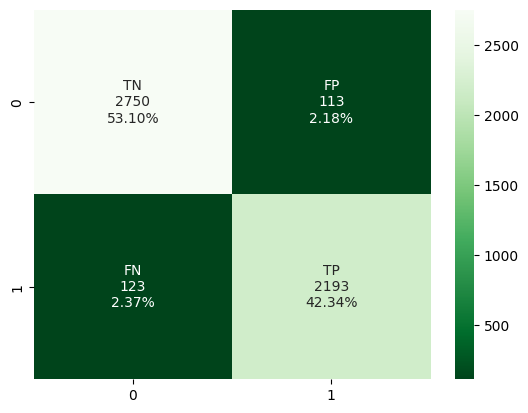

In [53]:
# Evaluasi menggunakan confusion matrix
confusion = confusion_matrix(y_test, best_model.predict(X_test))
names = ['TN','FP','FN','TP']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Greens_r',fmt ='')

Berdasarkan hasil confussion matrix bisa diambil kesimpulan sebagai berikut:
- True Negative (TN) : Model dengan benar mengidentifikasi passanger H8 Airways dissatisfied (0) dengan tingkat akurasi 53.10%  
- False Positive (FP) : Model salah mengidentifikasi dengan tingkat akurasi 2.18% yang sebenernya passanger dissatisfied (0) namun diidentifikasi satisfied (1).
- False Negative (FN) : Model salah mengidentifikasi dengan tingkat akurasi 2.37% yang sebenernya passanger satisfied (1) namun diidentifikasi dissatisfied (0).
- True Positive (TP) : Model dengan benar mengidentifikasi passanger H8 Airways satisfied (1) dengan tingkat akurasi 42.34% 

Berdasarkan hasil diatas juga bisa menghasilkan statement sebagai berikut:
1. Berdasarkan hasil confusion matrix, model memiliki tingkat keakuratan yang tinggi dalam memprediksi kepuasan pelanggan yang dissatisfied (TN) sebesar 53.10%. Namun masih terdapat kesalahan dalam mengidentifikasi beberapa kasus yang sebenarnya dissatisfied sebagai satisfied (FP) sebesar 2.18%.

2. Dari confusion matrix dapat disimpulkan bahwa model bisa menghindari kesalahan dalam memprediksi kepuasan pelanggan yang ditunjukan oleh skor FP dan FN yang lumayan rendah yaitu hanya sekitar 2% untuk keduanya.

3. Hasil confusion matrix menunjukkan bahwa model cukup baik dalam memprediksi pelanggan yang dissatisfied (TN) dan juga satisfied (TP), tetapi masih bisa ditingkatkan dalam mengidentifikasi keakuratan model dalam memprediksi pelanggan yang satisfied (TP) untuk memberikan hasil yang lebih balance dengan (TN).

## Hasil Prediction

In [54]:
# Membuat Dataframe X test baru untuk menambahkan satisfaction
X_pred = X_test.copy()
X_pred['satisfaction'] = y_test

In [55]:
# Membuat Dataframe X test baru untuk menambahkan hasil predict
X_pred['Prediction'] = test_predict
X_pred.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Prediction
17515,48114,Female,Loyal Customer,56,Business travel,Business,192,3,3,3,...,4,5,3,5,4,3,125,130.0,1,1
23668,45180,Male,Loyal Customer,62,Business travel,Eco Plus,130,2,2,2,...,3,1,1,3,3,2,38,64.0,1,0
19,64287,Female,Loyal Customer,50,Business travel,Business,3799,5,5,5,...,4,5,4,5,4,5,8,0.0,1,1
22365,44198,Male,Loyal Customer,17,Personal Travel,Eco,157,2,5,2,...,5,3,4,4,4,3,0,6.0,0,0
7650,99980,Male,Loyal Customer,43,Business travel,Business,2597,1,3,3,...,2,2,1,1,2,2,2,5.0,0,0


In [56]:
# Query untuk False Positive
X_fp = X_pred[(X_pred['satisfaction'] == 0) & (X_pred['Prediction'] == 1)]

# Query untuk False Negative
X_fn = X_pred[(X_pred['satisfaction'] == 1) & (X_pred['Prediction'] == 0)]

# Query untuk True Negative
X_tn = X_pred[(X_pred['satisfaction'] == 0) & (X_pred['Prediction'] == 0)]

# Query untuk True Positive
X_tp = X_pred[(X_pred['satisfaction'] == 1) & (X_pred['Prediction'] == 1)]

In [57]:
# False Positive
X_fp.select_dtypes(exclude='object').mean()

id                                   67842.079646
Age                                     36.858407
Flight Distance                       1096.805310
Inflight wifi service                    3.823009
Departure/Arrival time convenient        3.000000
Ease of Online booking                   3.389381
Gate location                            2.955752
Food and drink                           3.548673
Online boarding                          3.743363
Seat comfort                             3.539823
Inflight entertainment                   3.787611
On-board service                         3.362832
Leg room service                         3.415929
Baggage handling                         3.619469
Checkin service                          3.097345
Inflight service                         3.743363
Cleanliness                              3.389381
Departure Delay in Minutes              20.982301
Arrival Delay in Minutes                22.053097
satisfaction                             0.000000


Karakteristik Passanger yang terprediksi False Positive :
- Memiliki rata-rata umur 36 tahun.
- Flight Distance rata-rata 1096.
- Untuk penilaian passanger untuk kategori seperti Inflight WIFI service hingga Cleanliness berada pada rata-rata angka 3 namun lebih condong ke angka 4 (Beberapa ada yang > 3.5).
- Untuk Arrival dan Departure Delay ada pada rata-rata 20 dan 22 menit.

In [58]:
# False Negative
X_fn.select_dtypes(exclude='object').mean()

id                                   57505.447154
Age                                     35.479675
Flight Distance                        951.682927
Inflight wifi service                    3.333333
Departure/Arrival time convenient        3.300813
Ease of Online booking                   3.439024
Gate location                            3.016260
Food and drink                           2.991870
Online boarding                          3.382114
Seat comfort                             2.975610
Inflight entertainment                   2.943089
On-board service                         3.300813
Leg room service                         3.154472
Baggage handling                         3.276423
Checkin service                          3.065041
Inflight service                         3.471545
Cleanliness                              2.886179
Departure Delay in Minutes              10.642276
Arrival Delay in Minutes                11.195122
satisfaction                             1.000000


Karakteristik Passanger yang terprediksi False Negative :
- Memiliki rata-rata umur 35 tahun.
- Flight Distance rata-rata 951.
- Untuk penilaian passanger untuk kategori seperti Inflight WIFI service hingga Cleanliness berada pada rata-rata angka 3 namun lebih condong ke angka 2 (Tidak ada yang > 3.5).
- Untuk Arrival dan Departure Delay ada pada rata-rata 10 dan 11.

In [59]:
# True Positive
X_tp.select_dtypes(exclude='object').mean()

id                                   65831.948928
Age                                     41.829913
Flight Distance                       1574.766530
Inflight wifi service                    3.075695
Departure/Arrival time convenient        2.895121
Ease of Online booking                   2.986776
Gate location                            2.959416
Food and drink                           3.535340
Online boarding                          4.014136
Seat comfort                             3.994072
Inflight entertainment                   4.024168
On-board service                         3.927497
Leg room service                         3.842681
Baggage handling                         4.012312
Checkin service                          3.725034
Inflight service                         4.018240
Cleanliness                              3.792522
Departure Delay in Minutes              11.064751
Arrival Delay in Minutes                11.483812
satisfaction                             1.000000


Karakteristik Passanger yang terprediksi True Positive :
- Memiliki rata-rata umur 41 tahun.
- Flight Distance rata-rata 1574.
- Untuk penilaian passanger untuk kategori seperti Inflight WIFI service hingga Cleanliness berada pada rata-rata angka 3 hingga 4 namun ada beberapa yang fitur yang diberi penilaian 2 namun masih mendekati 3.
- Untuk Arrival dan Departure Delay ada pada rata-rata 11.

In [60]:
# True Negative
X_tn.select_dtypes(exclude='object').mean()

id                                   64250.157455
Age                                     38.007273
Flight Distance                        935.827273
Inflight wifi service                    2.344364
Departure/Arrival time convenient        3.135636
Ease of Online booking                   2.529455
Gate location                            2.988000
Food and drink                           2.941818
Online boarding                          2.636000
Seat comfort                             3.045818
Inflight entertainment                   2.853091
On-board service                         3.005091
Leg room service                         2.955636
Baggage handling                         3.344000
Checkin service                          3.024727
Inflight service                         3.384727
Cleanliness                              2.898182
Departure Delay in Minutes              15.652000
Arrival Delay in Minutes                16.584727
satisfaction                             0.000000


Karakteristik Passanger yang terprediksi True Negative :
- Memiliki rata-rata umur 38 tahun.
- Flight Distance rata-rata 935.
- Untuk penilaian passanger untuk kategori seperti Inflight WIFI service hingga Cleanliness berada pada rata-rata angka 2 hingga 3.
- Untuk Arrival dan Departure Delay ada pada rata-rata 15 dan 16.

---

# ix - Model Saving

Pada bagian ini akan dilakukan saving model yang akan digunakan untuk prediksi pada Model Inference.

In [61]:
# Menyimpan Model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

---

# x - Model Inference

Untuk Model Inference akan dilakukan di notebook **P1M2_irfan_risqy_Model_Inference.ipynb**.

---

# xi - Pengambilan Kesimpulan

## Kesimpulan EDA

- Jumlah persentase passenger yang satisfied sebesar 43.9% sedangkan untuk jumlah persentase passanger yang dissatisfied sebesar 56.1%.
- Kebanyakan passanger yang menggunakan jasa H8 Airways merupakan loyal customer.
- Kebanyakan passanger yang menggunakan jasa H8 Airways bepergian dengan tujuan Business Travel.
- Kebanyakan passanger maskapai H8 Airways memilih class Business dalam melakukan perjalanan.
- Kebanyakan passanger yang satisfied dan loyal adalah passanger yang memiliki usia diatas 30 tahun.
- Id, Gender, Departure & Arrival Delay in Minutes tidak memiliki korelasi yang signifikan terhadap Satisfaction passanger.
- Flight Distance, Ease of Online Booking, On-board & Leg Room Service dan Cleanliness memiliki korelasi yang lumayan signifikan terhadap Satisfaction passanger.
- Type of Travel, Inflight WIFI Service dan Online Boarding memiliki korelasi yang signifikan terhadap Satisfaction passanger.
- Perlu peningkatan pada Inflight WIFI Service dan Ease of Online Booking karena masih banyak passanger yang kurang puas terhadap layanan tersebut.


## Kesimpulan Model

- Setelah dilakukan Benchmarking, model Random Forest memiliki hasil accuracy Score yang paling bagus diantara model lainnya.
- Score accuracy pada test set sedikit lebih rendah dari score accuracy pada train set namun masih bisa dibilang goodfit karena selisih hanya sedikit dan juga score yang bisa dibilang tinggi.
- Model sudah bisa mengidentifikasi kepuasan pelanggan dengan akurat dan juga berhasil meminimalisir salah identifikasi.
- Model sudah berhasil mengidentifikasi kepuasan pelanggan dengan menggunakan data baru.

## Kelebihan Model

- Model sudah bisa memprediksi kepuasan pelanggan dengan menggunakan data baru.
- Score accuracy sudah bisa terbilang tinggi.
- Berhasil menekan persentase False Negative dan False Positive hingga menjadi 2%.
- Sudah bisa melakukan klasifikasi secara akurat dan efisien. 

## Kekurangan Model

- Model terindikasi sedikit Overfitting.
- Memerlukan waktu yang lebih lama dalam pembuatannya jika jumlah data terbilang banyak.
- Memerlukan data yang bagus karena jika data masih sedikit kurang bagus, akurasi akan berkurang.

## Improvement


- Bisa mencoba menggunakan metode trimming untuk handling outliers.
- Bisa mencoba metode lain untuk handling missing values.
- Bisa menggunakan variasi model klasifikasi lainnya.
- Bisa mencoba tweaking parameter untuk mencegah overfitting dan meningkatkan performa model.

## Problem Statement

Setelah membuat model klasifikasi yang bisa mengidentifikasi kepuasan pelanggan dengan akurat dengan persentase kesalahan identifikasi yang rendah, harapan kami adalah model ini bisa membantu untuk meningkatkan kepuasan pelanggan, mengurangi keluhan dan meningkatkan kualitas layanan kami secara keseluruhan agar bisa menekan persentase pelanggan yang dissatisfied dan meningkatkan persentase pelanggan yang satisfied.

---

# Conceptual Problems

1. Bagging (Bootstrap Aggregating) adalah sebuah teknik dalam machine learning yang digunakan untuk meningkatkan performa model prediksi dengan menggabungkan hasil dari beberapa model yang dibuat dari subset data pelatihan yang berbeda-beda. Ide utama di balik bagging adalah bahwa dengan mengkombinasikan prediksi dari beberapa model, kita dapat mengurangi variabilitas dan meningkatkan akurasi prediksi. Latar Belakang adanya Bagging adalah untuk mengatasi dua masalah utama dalam Machine Learning yaitu Overfitting dan Variablilitas.

    Cara Kerja Bagging :
    - Pembagian Data : Data pelatihan dibagi menjadi beberapa subset.
    - Pelatihan Model : Masing-masing subset data digunakan untuk melatih model prediksi yang sama.
    - Prediksi : Setelah melatih model-model ini, kita menggunakan semua model tersebut untuk membuat prediksi pada data test.
    - Aggregasi Prediksi : Hasil prediksi dari semua model dijumlahkan atau dirata-ratakan untuk menghasilkan prediksi akhir.
    - Hasil Akhir : Prediksi akhir ini lebih stabil dan memiliki kemungkinan lebih tinggi untuk menghasilkan hasil yang akurat.



2. Cara kerja algoritma Random Forest dan Adaboost adalah dua teknik ensemble learning yang berbeda dalam machine learning. Secara singkat perbedaan utama antara keduanya adalah cara mereka membangun model dan menggabungkan prediksi. Random Forest membangun banyak pohon keputusan secara independen dan mengambil hasil mayoritas, sementara Adaboost membangun model-model "lemah" secara berurutan dengan fokus pada data yang sulit dan memberi bobot pada model-model tersebut dalam hasil akhir. Keduanya adalah teknik yang kuat untuk meningkatkan kinerja model, tetapi dengan pendekatan yang berbeda.

3. Cross-validation adalah sebuah teknik dalam machine learning yang digunakan untuk mengukur seberapa baik model dalam menggeneralisasi dari data test ke data yang belum pernah dilihat sebelumnya. Ini membantu kita menghindari overfitting dan mendapatkan hasil prediksi yang lebih akurat dari kinerja model pada data baru.